In [22]:
from statsmodels.api import OLS, add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize

This notebook we will cover,
1. What Linear Regression is
2. What Ordinary Least Squares is
3. 3 different ways of Linear Regression applications for multiple inputs.
4. Create a DNN model and see whether it is superior.

# Linear Regression
In linear regression, we try to find a correlation coefficient for each independent variable and sometimes a constant to represent the dependant variable as a function of the independent variable.,

Ordinary Least Squares Method is a method that is used for optimizing the regression equation for the dataset. The goal is to minimize the sum of the distances between data samples and the line of the regression equation.

For a linear equation, it looks something like this, 

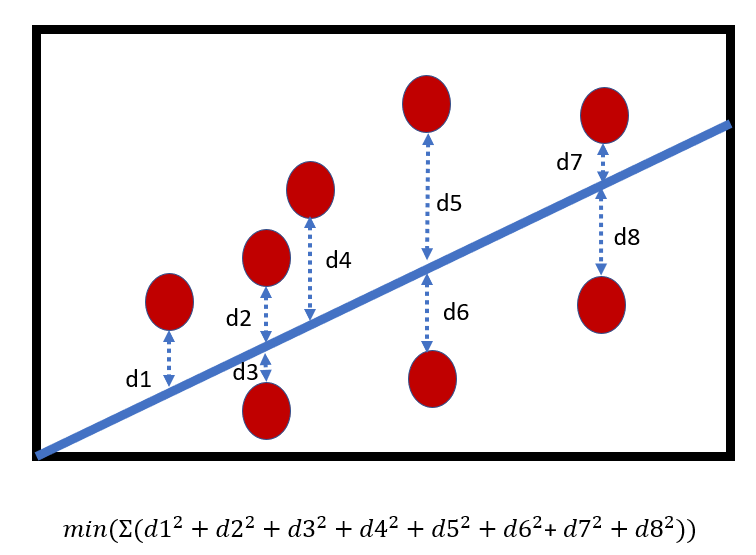

Let's see how to create a linear regression model by using ordinary least squares. But first, we have to import the dataset.

# Importing and Preprocessing the Dataset

In [23]:
data=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [24]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
y=data.quality
X=data.drop(['quality'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Regression Model with statsmodels.api

In [27]:
ols_model=OLS(y_train,X_train)
results=ols_model.fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8056.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                        0.00
Time:                        12:54:45   Log-Likelihood:                         -1192.1
No. Observations:                1199   AIC:                                      2406.
Df Residuals:                    1188   BIC:                                      2462.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.868      -0.034       0.041
volatile acidity        -1.0221      0.140     -7.276      0.000      -1.298      -0.746
citric acid             -0.1352      0.173     -0.783      0.434      -0.474       0.204
residual sugar           0.0001      0.014      0.010      0.992      -0.027       0.028
chlorides               -1.7809      0.471     -3.778      0.000      -2.706      -0.856
free sulfur dioxide      0.0052      0.003      2.008      0.045       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.364      0.000      -0.005      -0.002
density                  4.2080      0.724      5.809      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.385      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.295      0.000       0.546       1.040
alcohol                  0.3050      0.020     14.944      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.033   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.079
Skew:                          -0.179   Prob(JB):                     7.29e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So there are lots of variables here to explain. Let's start one by one.

**R-squared:** This is a metric that tells us how successful the independent variable (or variables) expresses the dependent variable.   

**Adj. R-squared:** Since R-squared is about explainability, whenever we add information R-squared increases. The problem is the added information is not always informative. Adjusted R-squared is resistant to this type of information so we can say that it is a more reliable metric while evaluating the model.

**F-statistic:** This shows how "meaningful" the model is. 

**Prob (F-statistic):** It is the "P" value of F-statistic. Since P<0.05, we can say that the model is meaningful.

**AIC and BIC:** These are used for model comparison.

**coef:** Coefficients of each independent variable.

**std.err:** Standard error of these coefficients.

**t:** t values of the coefficients.

**P>|t|:** P values for t values. We can understand whether containing any independent variable is meaningful to explain the model or not. Variables having P>0.05, should be removed from the model. (fixed acidity, citric acid, and residual sugar)

**[0.025 0.975]:** Confidence intervals

We should also add a constant to the model. Even this decreases the R-squared value, it makes our model more realistic.

 *An intercept is not included by default and should be added by the user.* (From the description of OLS)
 
So, for this purpose, we can use "add_constant()" from statsmodels.api. 

In [29]:
X.drop(['fixed acidity','citric acid','residual sugar'],axis=1,inplace=True)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [31]:
X_train=add_constant(X_train)
X_test=add_constant(X_test)
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     81.64
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.40e-107
Time:                        12:54:47   Log-Likelihood:                -1192.2
No. Observations:                1199   AIC:                             2402.
Df Residuals:                    1190   BIC:                             2448.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5998     12.450      0.691      0.490     -15.826      33.026
volatile acidity        -0.9577      0.117     -8.183      0.000      -1.187      -0.728
chlorides               -1.8862      0.445     -4.236      0.000      -2.760      -1.013
free sulfur dioxide      0.0055      0.003      2.175      0.030       0.001       0.010
total sulfur dioxide    -0.0039      0.001     -4.829      0.000      -0.005      -0.002
density                 -4.4148     12.288     -0.359      0.719     -28.523      19.693
pH                      -0.4222      0.141     -2.993      0.003      -0.699      -0.145
sulphates                0.8023      0.127      6.326      0.000       0.554       1.051
alcohol                  0.2943      0.022     13.283      0.000       0.251       0.338
==============================================================================
Omnibus:                       25.683   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.215
Skew:                          -0.179   Prob(JB):                     1.12e-09
Kurtosis:                       3.835   Cond. No.                     5.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
results.predict(X_test)[0:5]

803     5.332023
124     5.038873
350     5.616547
682     5.468969
1326    5.759155
dtype: float64

The predictions are float numbers however, the values in the dataset are integers. So we have to convert them to the same format before evaluating the models.

In [33]:
def rounder(array):
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [34]:
ols_pred=results.predict(X_test)
rounded_pred_ols=rounder(ols_pred)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 0.8276472678623424


# Regression Model with Scikit-Learn

In [35]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

We can also see the coefficients and intercepts with .coef_ and .intercept_ keywords.

In [36]:
print('Coefficients: ', np.round(lm.coef_,2))
print('Intercept: ', np.round(lm.intercept_,2))

Coefficients:  [ 0.   -0.96 -1.89  0.01 -0.   -4.41 -0.42  0.8   0.29]
Intercept:  8.6


In [37]:
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.8276472678623424


# Regression Model with Tensorflow
We will use a dense layer for linear regression. It will produce an equation y=mx+b where m is a matrix with dimensions (number of features,1)

In [38]:
tensor_lm=Sequential()
tensor_lm.add(Dense(units=1,input_shape=[9,]))#single output

In [39]:
tensor_lm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [40]:
tensor_lm.compile(optimizer='Adam',
                 loss='mean_squared_error')

In [41]:
X_train.shape

(1199, 9)

In [43]:
hist=tensor_lm.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=0)

In [45]:
history_df=pd.DataFrame(hist.history)

In [46]:
history_df['epoch']=hist.epoch

In [47]:
history_df.head()

,loss,val_loss,epoch
0,0.827284,0.720599,0
1,0.810628,0.699210,1
2,0.793075,0.680514,2
3,0.778148,0.662005,3
4,0.762555,0.643994,4


In [50]:
test_preds=tensor_lm.predict(X_test).flatten()

In [51]:
rounded_array_tensor=rounder(test_preds)

In [52]:
print(f'The RMSE of tensorflow model: {np.sqrt(mean_squared_error(rounded_array_tensor,y_test))}')

The RMSE of tensorflow model: 0.8246211251235321


The "m" we discussed above is,

In [53]:
tensor_lm.layers[0].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.97139263],
       [-0.5269438 ],
       [-0.08218738],
       [ 0.00499037],
       [-0.00196659],
       [ 0.12504844],
       [-0.05497412],
       [ 0.04907634],
       [ 0.4503146 ]], dtype=float32)>

**Question:** Can we boost the accuracy of the deep learning linear regression model?

# DNN Regression
In DNN Regression, we use several additional dense layers before the final one. Let's see whether it increases the accuracy of our model.

Note: Please keep in mind that adding additional layers will not always boost the accuracy. I have already proven that [here](https://www.kaggle.com/egemenuurdalg/ml-model-vs-ann-vs-deeper-ann) for instance.

In [58]:
tensor_lm_n=Sequential()
tensor_lm_n.add(Dense(units=64,input_shape=(9,), activation='relu'))
tensor_lm_n.add(Dense(units=64,activation='relu'))
tensor_lm_n.add(Dense(units=1))

In [59]:
tensor_lm_n.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
hist=tensor_lm_n.fit(X_train,y_train,epochs=100,verbose=0, validation_split=0.2)

In [61]:
pred=tensor_lm_n.predict(X_test)
pred=rounder(pred)
print(f'RMSE for DNN Model: {np.sqrt(mean_squared_error(y_test,pred))}')

RMSE for DNN Model: 0.7842193570679061


Thanks...